In [43]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('C:/Users/abd elrahman/Desktop/data/walmart-sales-dataset-of-45stores.csv')

df 
df.Date = pd.to_datetime(df.Date)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [16]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [17]:
df=df.drop_duplicates()
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [18]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [19]:
ws=df.groupby('Store')['Weekly_Sales'].sum().round()
ws

Store
1     222402809.0
2     275382441.0
3      57586735.0
4     299543953.0
5      45475689.0
6     223756131.0
7      81598275.0
8     129951181.0
9      77789219.0
10    271617714.0
11    193962787.0
12    144287230.0
13    286517704.0
14    288999911.0
15     89133684.0
16     74252425.0
17    127782139.0
18    155114734.0
19    206634862.0
20    301397792.0
21    108117879.0
22    147075649.0
23    198750618.0
24    194016021.0
25    101061179.0
26    143416394.0
27    253855917.0
28    189263681.0
29     77141554.0
30     62716885.0
31    199613906.0
32    166819246.0
33     37160222.0
34    138249763.0
35    131520672.0
36     53412215.0
37     74202740.0
38     55159626.0
39    207445542.0
40    137870310.0
41    181341935.0
42     79565752.0
43     90565435.0
44     43293088.0
45    112395341.0
Name: Weekly_Sales, dtype: float64

In [20]:
print('the sum of the weekly sales of the store with highest sales is:',ws.max())
print('the store with the highest weekly sales is: ',ws.idxmax(axis=0))

the sum of the weekly sales of the store with highest sales is: 301397792.0
the store with the highest weekly sales is:  20


In [21]:
D=df.groupby('Store')['Weekly_Sales'].sum().round().to_frame().reset_index()


<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

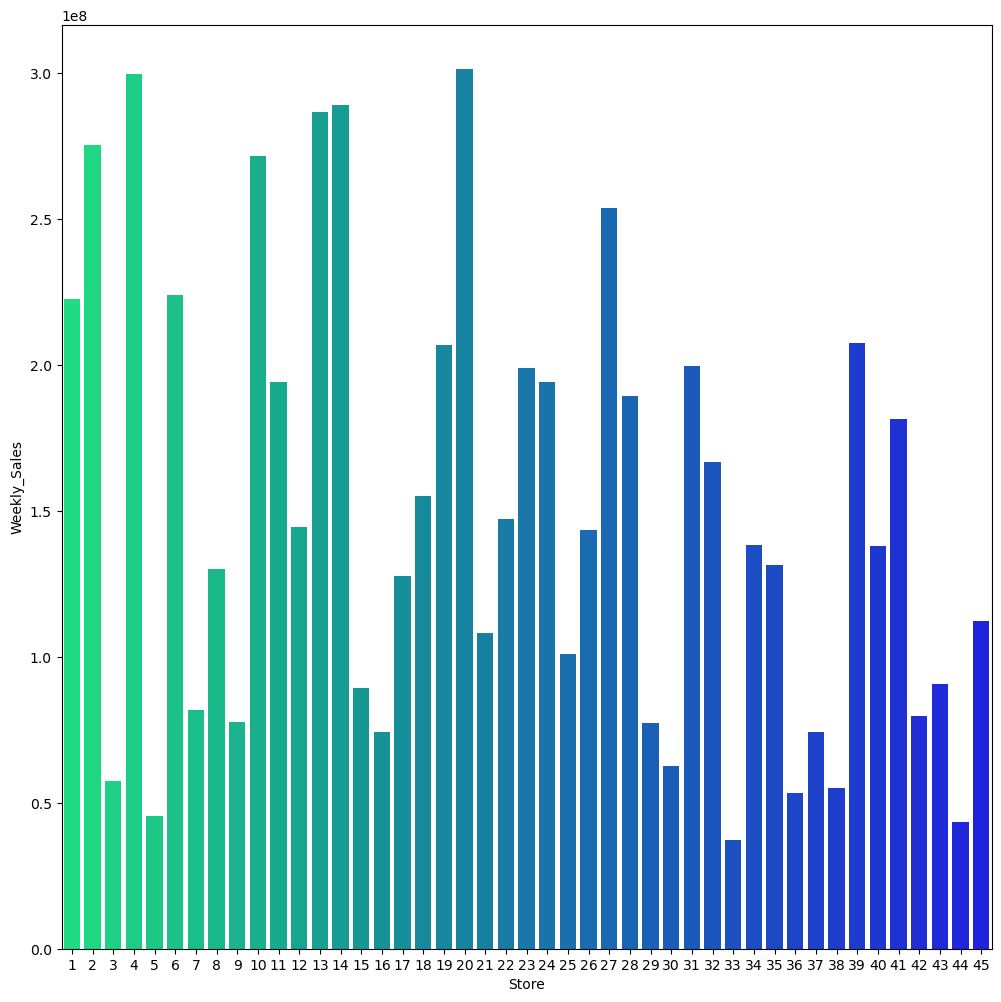

In [22]:
fig = plt.figure(figsize=(12,12))
sns.barplot(data=D, x='Store', y='Weekly_Sales',palette='winter_r')

In [23]:
ws_std=df.groupby('Store')['Weekly_Sales'].std()
ws_std

Store
1     155980.767761
2     237683.694682
3      46319.631557
4     266201.442297
5      37737.965745
6     212525.855862
7     112585.469220
8     106280.829881
9      69028.666585
10    302262.062504
11    165833.887863
12    139166.871880
13    265506.995776
14    317569.949476
15    120538.652043
16     85769.680133
17    112162.936087
18    176641.510839
19    191722.638730
20    275900.562742
21    128752.812853
22    161251.350631
23    249788.038068
24    167745.677567
25    112976.788600
26    110431.288141
27    239930.135688
28    181758.967539
29     99120.136596
30     22809.665590
31    125855.942933
32    138017.252087
33     24132.927322
34    104630.164676
35    211243.457791
36     60725.173579
37     21837.461190
38     42768.169450
39    217466.454833
40    119002.112858
41    187907.162766
42     50262.925530
43     40598.413260
44     24762.832015
45    130168.526635
Name: Weekly_Sales, dtype: float64

In [24]:
print('the highest standard deviation is:',ws_std.max())
print('the store with the highest standard deviation is: ',ws_std.idxmax(axis=0))

the highest standard deviation is: 317569.9494755081
the store with the highest standard deviation is:  14


In [37]:
H=df.groupby('Holiday_Flag')['Weekly_Sales'].sum().round().to_frame().reset_index()
H

,Holiday_Flag,Weekly_Sales
0,0,6.231919e+09
1,1,5.052996e+08


In [45]:
##info about holiday
Super_Bowl = ['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010','25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

# Calculating holiday events sales
Super_Bowl_sales = round(df.loc[df.Date.isin(Super_Bowl)]['Weekly_Sales'].mean(),2)
Labour_Day_sales = round(df.loc[df.Date.isin(Labour_Day)]['Weekly_Sales'].mean(),2)
Thanksgiving_sales = round(df.loc[df.Date.isin(Thanksgiving)]['Weekly_Sales'].mean(),2)
Christmas_sales = round(df.loc[df.Date.isin(Christmas)]['Weekly_Sales'].mean(),2)
Super_Bowl_sales, Labour_Day_sales, Thanksgiving_sales, Christmas_sales

(1079127.99, 1042427.29, 1471273.43, 960833.11)

In [46]:
non_holiday_sales = round(df.query('Holiday_Flag == 0')['Weekly_Sales'].mean(),2)
non_holiday_sales

1041256.38

In [48]:
result = {'Super Bowl Sales':Super_Bowl_sales,
              'Labour Day Sales':Labour_Day_sales,
              'Thanksgiving Sales':Thanksgiving_sales,
              'Christmas Sales':Christmas_sales,
              'Non Holiday Sales':non_holiday_sales}
result

{'Super Bowl Sales': 1079127.99,
 'Labour Day Sales': 1042427.29,
 'Thanksgiving Sales': 1471273.43,
 'Christmas Sales': 960833.11,
 'Non Holiday Sales': 1041256.38}

In [49]:
for i in result:
    if(result[i]>non_holiday_sales):
        print('{} higher than the mean sales in the non-holiday season'.format(i))

Super Bowl Sales higher than the mean sales in the non-holiday season
Labour Day Sales higher than the mean sales in the non-holiday season
Thanksgiving Sales higher than the mean sales in the non-holiday season


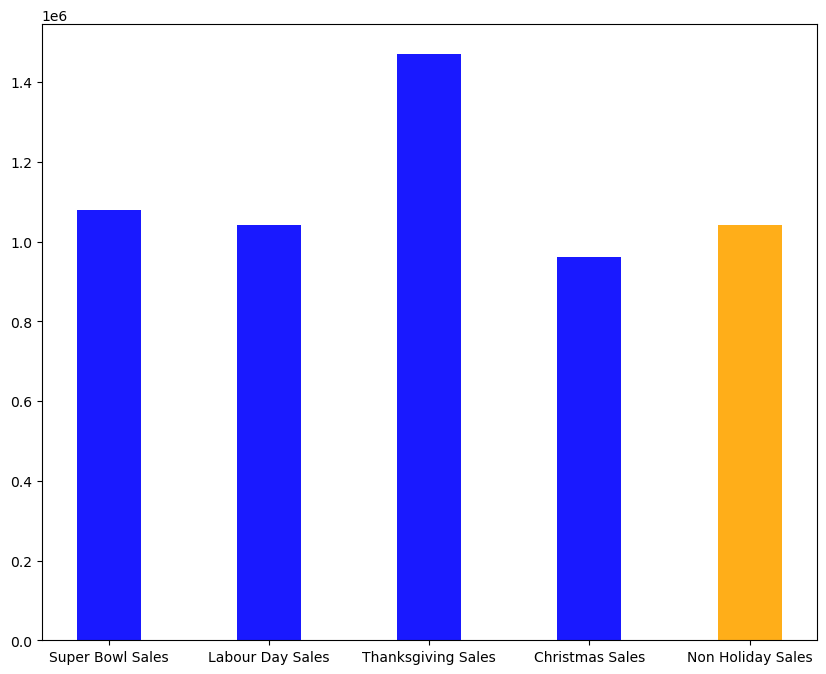

In [51]:
c=['blue','blue','blue','blue','orange']
plt.figure(figsize=(10,8))
plt.bar(result.keys(), result.values(), color =c,width = 0.4,alpha=0.9);

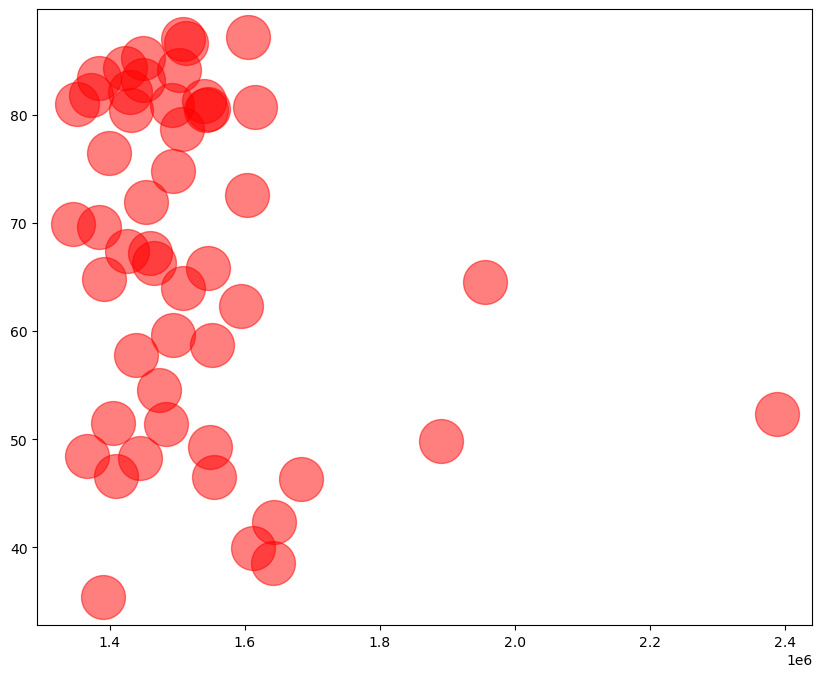

In [53]:
z = np.random.rand(100)
plt.figure(figsize=(10, 8))
plt.scatter(df['Weekly_Sales'].head(50),df['Temperature'].head(50),color='red',s= 1000, alpha=0.5);